In [34]:
import rosbag
# Path to your ROS bag file
bag_file_path = "2023-10-31-14-28-26.bag"

# Open the bag file
bag = rosbag.Bag(bag_file_path)

# Get the list of topics
topics = bag.get_type_and_topic_info().topics.keys()

# Print the list of topics
for topic in topics:
    print(topic)



# Have to find the time of the first  message to get when ROV start
for topic, msg, t in bag.read_messages():
    ROV_start_time = t # time since last epoch [ns]
    break


/bluerov2/bluerov2_alive
/bluerov2/bluerov2_armed
/bluerov2/image
/bluerov2_modes
/commanded_thrust
/controller/pid_x
/controller/pid_y
/controller/pid_yaw
/controller/pid_z
/gui/netFollowing_manager
/gui/sensor/ping360
/guidance
/joystick/dead_reckoning_reset
/joystick/joystick_init
/joystick/joystick_thrust
/navigation/plane_approximation
/navigation/plane_approximation_position
/rosout
/rosout_agg
/sensor/attitude
/sensor/depth_temperature
/sensor/dvl_position
/sensor/dvl_reset_position
/sensor/dvl_velocity
/sensor/imu
/sensor/ping
/sensor/ping360
/sensor/usbl
/ted/image


# Roll, pitch yaw from IMU and flters 

In [35]:
roll_attitude = []
pitch_attitude = []
yaw_attitude = []
attitude_time_epoch = []

for topic, msg, t in bag.read_messages(topics=['/sensor/attitude']):
    roll_attitude.append(msg.roll)
    pitch_attitude.append(msg.pitch)
    yaw_attitude.append(msg.yaw)
    attitude_time_epoch.append(t)


# Find when first DVL msg was received in  coparison to when ROV got first msg.
time_diff_attitude_ROV = (attitude_time_epoch[0]- ROV_start_time).to_sec()   
attitude_time = [time_diff_attitude_ROV]


# Calculate time differences between consecutive elements
for i in range(1, len(attitude_time_epoch)):
    time_diff = attitude_time_epoch[i] - attitude_time_epoch[i - 1]
    # Accumulate time differences to get total time duration
    attitude_time.append(time_diff.to_sec() + attitude_time[i - 1])  # Convert to seconds

KeyboardInterrupt: 

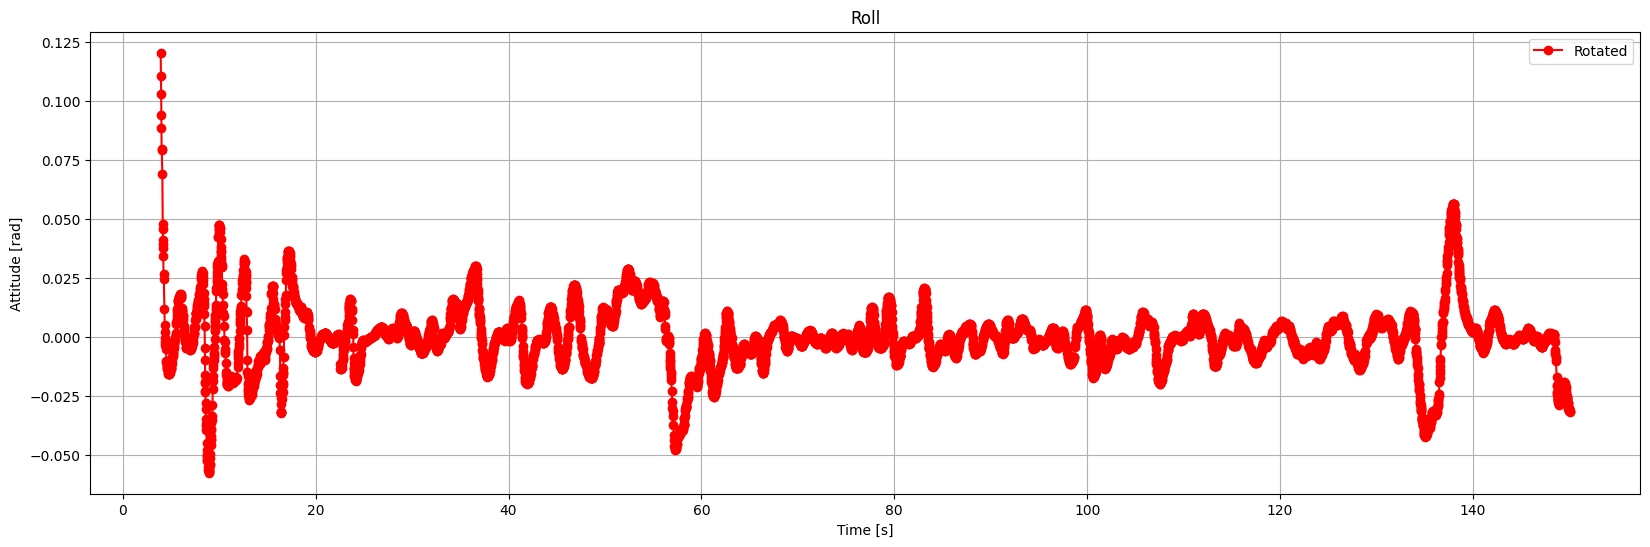

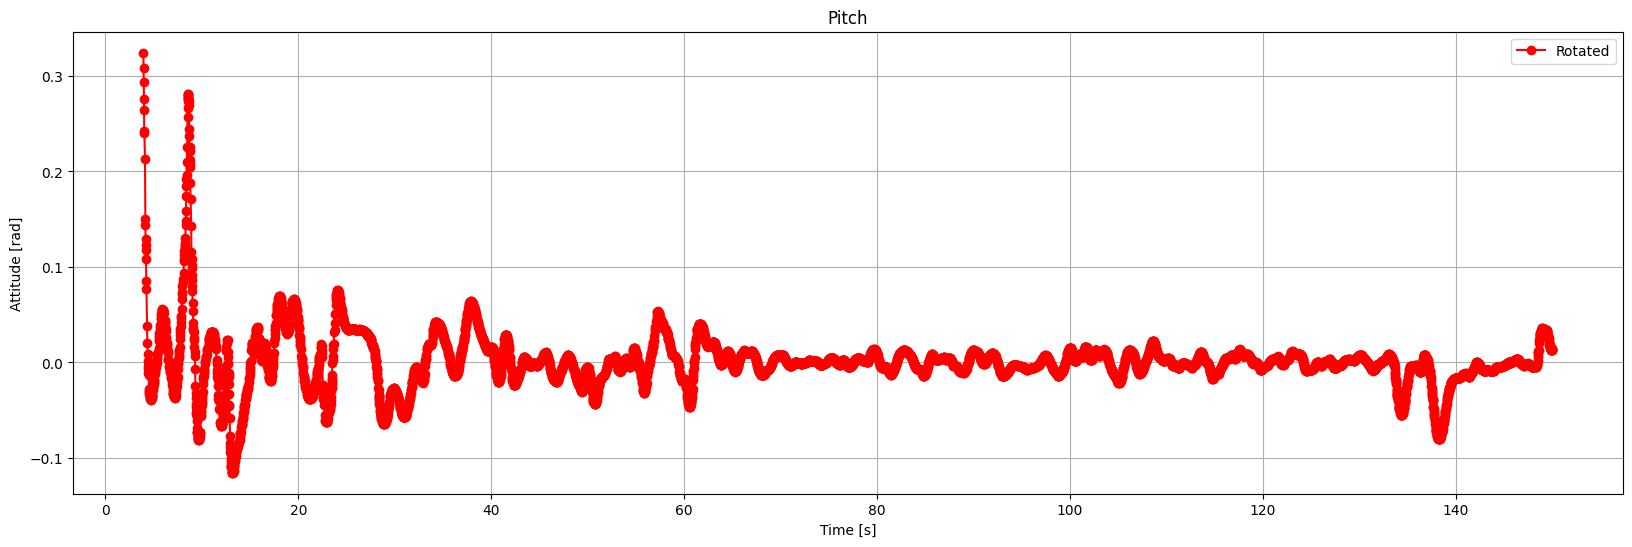

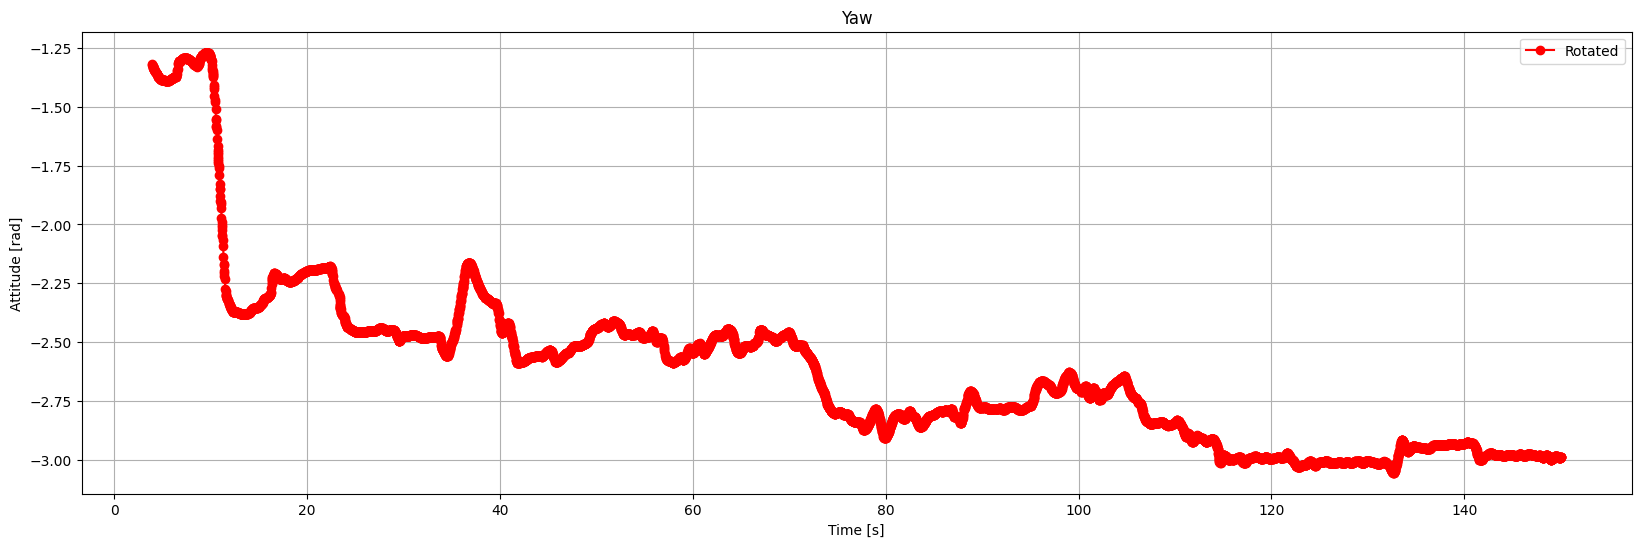

In [ ]:
import matplotlib.pyplot  as plt

plt.figure(figsize=(20, 6))
plt.plot(attitude_time, roll_attitude, color='r', marker='o', linestyle='-', label="Rotated")
plt.title('Roll')  # Corrected line
plt.xlabel('Time [s]')  # Corrected line
plt.ylabel('Attitude [rad]')  # Corrected line
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(20, 6))
plt.plot(attitude_time, pitch_attitude, color='r', marker='o', linestyle='-', label="Rotated")
plt.title('Pitch')  # Corrected line
plt.xlabel('Time [s]')  # Corrected line
plt.ylabel('Attitude [rad]')  # Corrected line
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(20, 6))
plt.plot(attitude_time, yaw_attitude, color='r', marker='o', linestyle='-', label="Rotated")
plt.title('Yaw')  # Corrected line
plt.xlabel('Time [s]')  # Corrected line
plt.ylabel('Attitude [rad]')  # Corrected line
plt.legend()
plt.grid(True)
plt.show()

# DVL heading and pitch

In [139]:
import math 

DVL_time_epoch = []
DVL_net_heading = []
DVL_net_pitch = []

for topic, msg, t in bag.read_messages(topics=['/navigation/plane_approximation']):
    DVL_time_epoch.append(t)
    DVL_net_heading.append(msg.NetHeading)
    DVL_net_pitch.append(msg.NetPitch)

# Find when first DVL msg was received in  coparison to when ROV got first msg.
time_diff_DVL_ROV = (DVL_time_epoch[0]- ROV_start_time).to_sec()   
DVL_time = [time_diff_DVL_ROV]

# Calculate time differences between consecutive elements
for i in range(1, len(DVL_time_epoch)):
    time_diff = DVL_time_epoch[i] - DVL_time_epoch[i - 1]
    # Accumulate time differences to get total time duration
    DVL_time.append(time_diff.to_sec() + DVL_time[i - 1])  # Convert to seconds

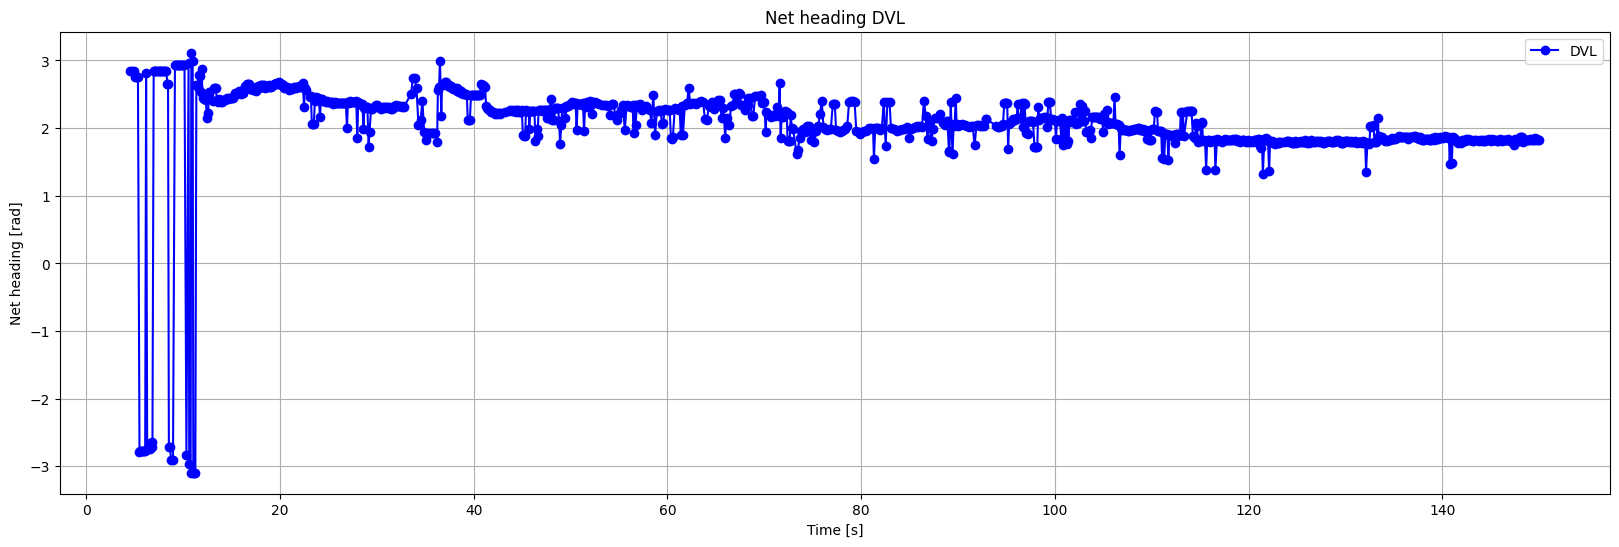

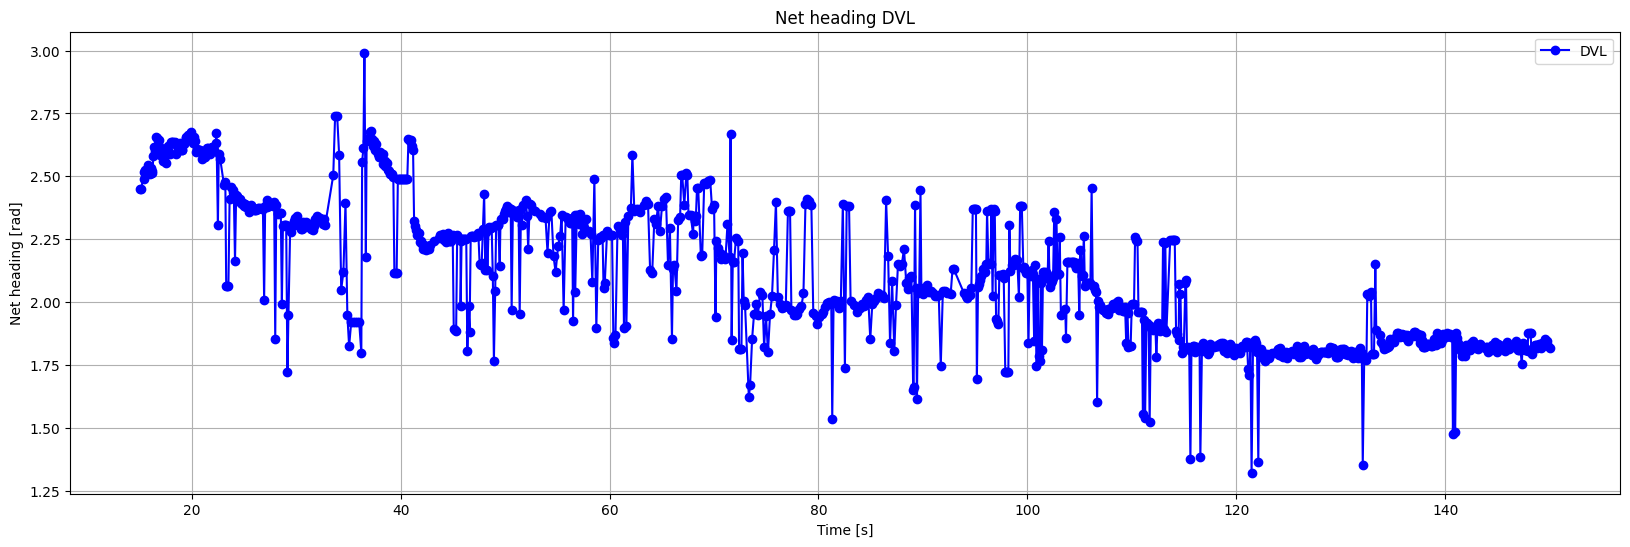

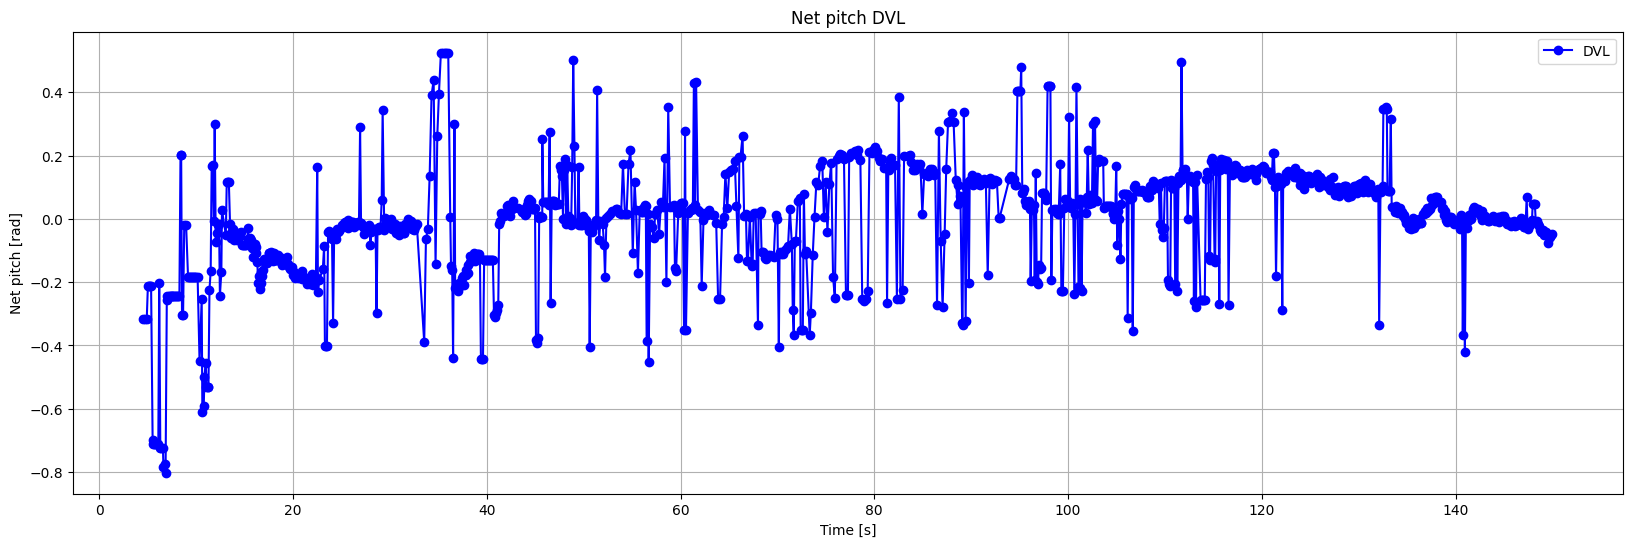

In [140]:
DVL_time_heading_cut = []
DVL_heading_cut = []

for i in range(len(DVL_time)):
    if DVL_time[i] > 15:
        DVL_time_heading_cut.append(DVL_time[i])
        DVL_heading_cut.append(DVL_net_heading[i])


# Plot for FDVL Heading
plt.figure(figsize=(20, 6))
plt.plot(DVL_time, DVL_net_heading, color='b', marker='o', linestyle='-', label="DVL")
plt.title('Net heading DVL')  # Corrected line
plt.xlabel('Time [s]')  # Corrected line
plt.ylabel('Net heading [rad]')  # Corrected line
plt.legend()
plt.grid(True)
plt.show()

# Plot for DVL Heading
plt.figure(figsize=(20, 6))
plt.plot(DVL_time_heading_cut, DVL_heading_cut, color='b', marker='o', linestyle='-', label="DVL")
plt.title('Net heading DVL')  # Corrected line
plt.xlabel('Time [s]')  # Corrected line
plt.ylabel('Net heading [rad]')  # Corrected line
plt.legend()
plt.grid(True)
plt.show()


# Plot for DVL Pitch
plt.figure(figsize=(20, 6))
plt.plot(DVL_time, DVL_net_pitch, color='b', marker='o', linestyle='-', label="DVL")
plt.title('Net pitch DVL')  # Corrected line
plt.xlabel('Time [s]')  # Corrected line
plt.ylabel('Net pitch [rad]')  # Corrected line
plt.legend()
plt.grid(True)
plt.show()


# TRASH

In [ ]:
# Iterate over the messages in the bag
acc_x = []
acc_y = []
acc_z = []

gyro_x = []
gyro_y = []
gyro_z = []

IMU_time_epoch = []


for topic, msg, t in bag.read_messages(topics=['/sensor/imu']):
    acc_x.append(msg.acc_x)
    acc_y.append(msg.acc_y)
    acc_z.append(msg.acc_z)
    gyro_x.append(msg.gyro_x)
    gyro_y.append(msg.gyro_y)
    gyro_z.append(msg.gyro_z)
    IMU_time_epoch.append(t)
    print(msg)


# Find when first DVL msg was received in  coparison to when ROV got first msg.
time_diff_IMU_ROV = (IMU_time_epoch[0]- ROV_start_time).to_sec()   
IMU_time = [time_diff_IMU_ROV]


# Calculate time differences between consecutive elements
for i in range(1, len(IMU_time_epoch)):
    time_diff = IMU_time_epoch[i] - IMU_time_epoch[i - 1]
    # Accumulate time differences to get total time duration
    IMU_time.append(time_diff.to_sec() + IMU_time[i - 1])  # Convert to seconds

print(gyro_x)
print("Length of acc_x:", len(acc_x))
print("Length of acc_y:", len(acc_y))
print("Length of acc_z:", len(acc_z))
print("Length of gyro_x:", len(gyro_x))
print("Length of gyro_y:", len(gyro_y))
print("Length of gyro_z:", len(gyro_z))
print("Length of IMU_time:", len(IMU_time))

header: 
  seq: 1
  stamp: 
    secs: 1698758910
    nsecs:  23939132
  frame_id: ''
acc_x: 314.0
acc_y: -83.0
acc_z: -932.0
gyro_x: 54.0
gyro_y: 3.0
gyro_z: 31.0
mag_x: 0.0
mag_y: 0.0
mag_z: 0.0
header: 
  seq: 2
  stamp: 
    secs: 1698758910
    nsecs:  55940389
  frame_id: ''
acc_x: 314.0
acc_y: -79.0
acc_z: -933.0
gyro_x: 58.0
gyro_y: 14.0
gyro_z: 34.0
mag_x: 0.0
mag_y: 0.0
mag_z: 0.0
header: 
  seq: 3
  stamp: 
    secs: 1698758910
    nsecs: 161938667
  frame_id: ''
acc_x: 292.0
acc_y: -90.0
acc_z: -909.0
gyro_x: 11.0
gyro_y: 8.0
gyro_z: 33.0
mag_x: 0.0
mag_y: 0.0
mag_z: 0.0
header: 
  seq: 4
  stamp: 
    secs: 1698758910
    nsecs: 270136594
  frame_id: ''
acc_x: 289.0
acc_y: -91.0
acc_z: -918.0
gyro_x: 6.0
gyro_y: 24.0
gyro_z: 29.0
mag_x: 0.0
mag_y: 0.0
mag_z: 0.0
header: 
  seq: 5
  stamp: 
    secs: 1698758910
    nsecs: 272139310
  frame_id: ''
acc_x: 272.0
acc_y: -101.0
acc_z: -938.0
gyro_x: -8.0
gyro_y: 26.0
gyro_z: 35.0
mag_x: 0.0
mag_y: 0.0
mag_z: 0.0
header: 
  seq: 6

3737
3737


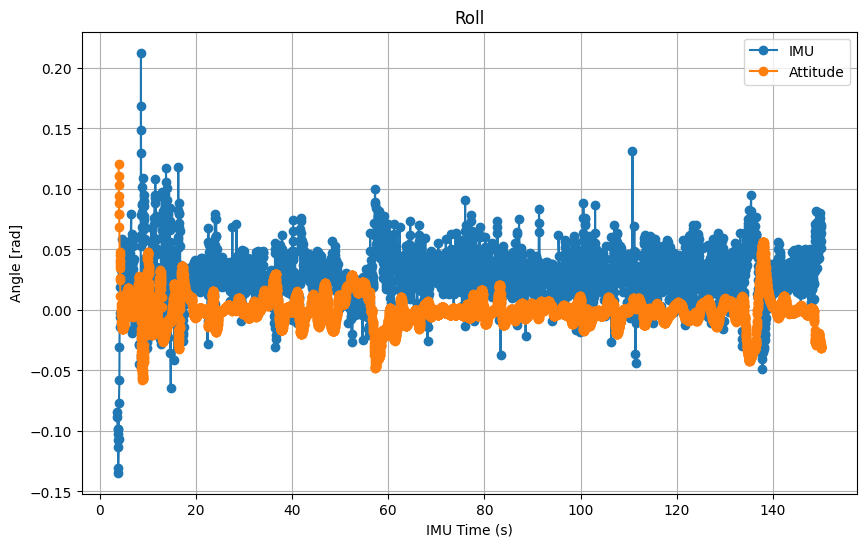

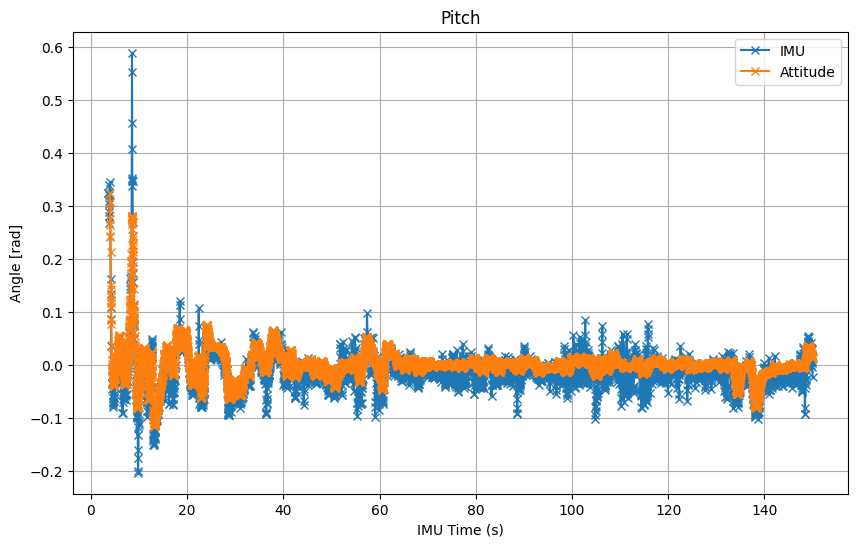

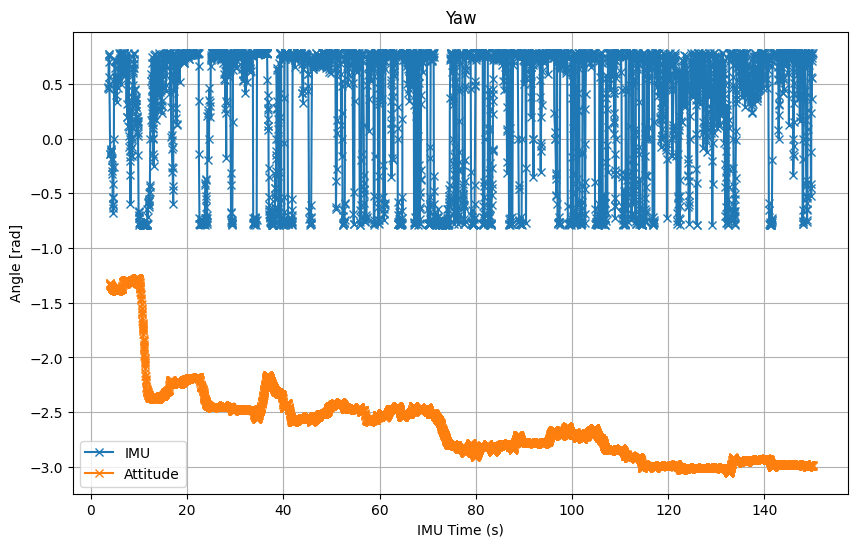

In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt


def from_pipi_to_zero2pi(angle_pipi):
    if angle_pipi > 0:
        angles_02pi = angle_pipi - math.pi
    else:
        angles_02pi = angle_pipi + math.pi
    return angles_02pi


roll = []
pitch = []
yaw = []
for i in range(len(IMU_time)): 
    # Roll and pitch equations
    roll.append(from_pipi_to_zero2pi(math.atan2(-acc_y[i], acc_z[i])))
    pitch.append(math.atan2(acc_x[i], math.sqrt(acc_y[i]**2 + acc_z[i]**2)))
     # Yaw (gyroscope integration, consider drift)
    yaw.append(math.atan2(gyro_z[i], math.sqrt(gyro_x[i]**2 + gyro_z[i]**2)))
  


print(len(IMU_time))
print(len(roll))
# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot roll and pitch
ax.plot(IMU_time, roll, label='IMU', marker='o')
ax.plot(attitude_time, roll_attitude, label='Attitude', marker='o')

# Customize the plot
ax.set_xlabel('IMU Time (s)')
ax.set_ylabel('Angle [rad]')
ax.set_title('Roll')
ax.grid(True)
ax.legend()

fig, ax2 = plt.subplots(figsize=(10, 6))
ax2.plot(IMU_time, pitch, label='IMU', marker='x')
ax2.plot(attitude_time, pitch_attitude, label='Attitude', marker='x')


# Customize the plot
ax2.set_xlabel('IMU Time (s)')
ax2.set_ylabel('Angle [rad]')
ax2.set_title('Pitch')
ax2.grid(True)
ax2.legend()


fig, ax3 = plt.subplots(figsize=(10, 6))
ax3.plot(IMU_time, yaw, label='IMU', marker='x')
ax3.plot(attitude_time, yaw_attitude, label='Attitude', marker='x')


# Customize the plot
ax3.set_xlabel('IMU Time (s)')
ax3.set_ylabel('Angle [rad]')
ax3.set_title('Yaw')
ax3.grid(True)
ax3.legend()


# Show the plot
plt.show()

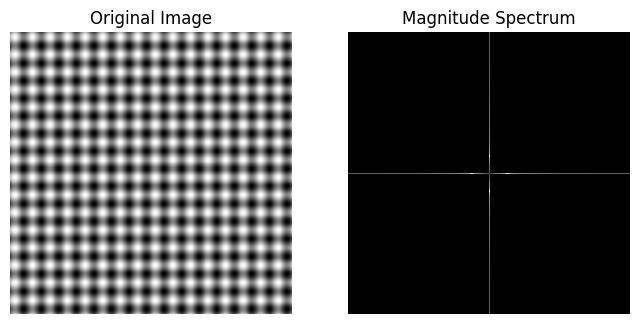

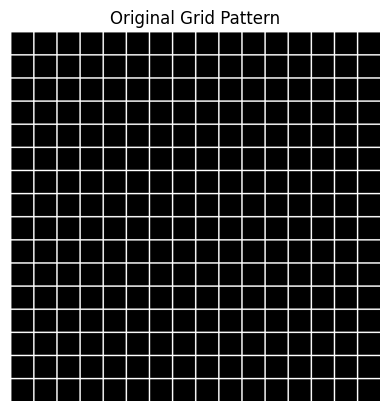

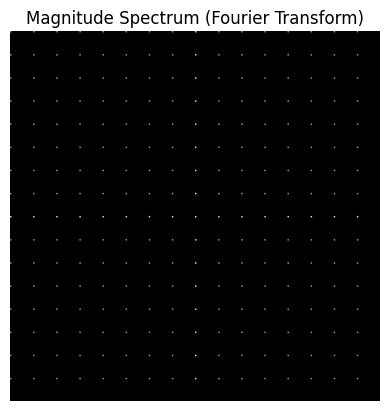

In [132]:
import numpy as np
import matplotlib.pyplot as plt

# Image size
N = 256  # Change the value to adjust the image size

# Create grid coordinates
x = np.linspace(0, 32*np.pi, N)
y = np.linspace(0, 32*np.pi, N)
X, Y = np.meshgrid(x, y)

# Create sinusoidal patterns
horizontal_pattern = np.sin(Y)
vertical_pattern = np.sin(X)

# Combine horizontal and vertical patterns
image = horizontal_pattern + vertical_pattern

# Plot the image
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Take Fourier transform
fourier_transform = np.fft.fft2(image)
fourier_transform_shifted = np.fft.fftshift(fourier_transform)
magnitude_spectrum = np.abs(fourier_transform_shifted)

# Plot the magnitude spectrum
plt.subplot(1, 2, 2)
plt.imshow(np.log(1 + magnitude_spectrum), cmap='gray')
plt.title('Magnitude Spectrum')
plt.axis('off')

plt.show()

import numpy as np
import matplotlib.pyplot as plt

# Image size
N = 256  # Change the value to adjust the image size

# Create grid pattern
grid_pattern = np.zeros((N, N))
grid_pattern[::16, :] = 1  # Set every 32nd row to 1
grid_pattern[:, ::16] = 1  # Set every 32nd column to 1

# Plot the grid pattern
plt.imshow(grid_pattern, cmap='gray')
plt.title('Original Grid Pattern')
plt.axis('off')  # Turn off axis
plt.show()

# Compute Fourier transform
fourier_transform = np.fft.fft2(grid_pattern)
fourier_transform_shifted = np.fft.fftshift(fourier_transform)
magnitude_spectrum = np.abs(fourier_transform_shifted)

# Plot the magnitude spectrum
plt.imshow(np.log(1 + magnitude_spectrum), cmap='gray')
plt.title('Magnitude Spectrum (Fourier Transform)')
plt.axis('off')  # Turn off axis
plt.show()


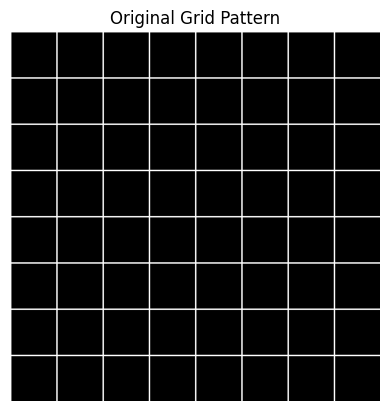

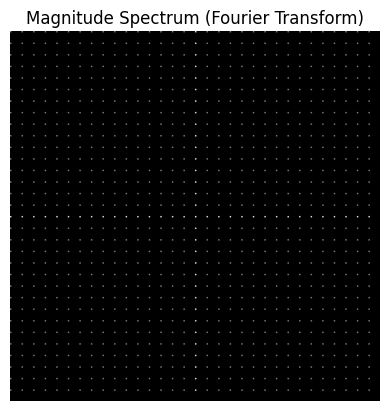

In [108]:
import numpy as np
import matplotlib.pyplot as plt

# Image size
N = 256  # Change the value to adjust the image size

# Create grid pattern
grid_pattern = np.zeros((N, N))
grid_pattern[::32, :] = 1  # Set every 32nd row to 1
grid_pattern[:, ::32] = 1  # Set every 32nd column to 1

# Plot the grid pattern
plt.imshow(grid_pattern, cmap='gray')
plt.title('Original Grid Pattern')
plt.axis('off')  # Turn off axis
plt.show()

# Compute Fourier transform
fourier_transform = np.fft.fft2(grid_pattern)
fourier_transform_shifted = np.fft.fftshift(fourier_transform)
magnitude_spectrum = np.abs(fourier_transform_shifted)

# Plot the magnitude spectrum
plt.imshow(np.log(1 + magnitude_spectrum), cmap='gray')
plt.title('Magnitude Spectrum (Fourier Transform)')
plt.axis('off')  # Turn off axis
plt.show()


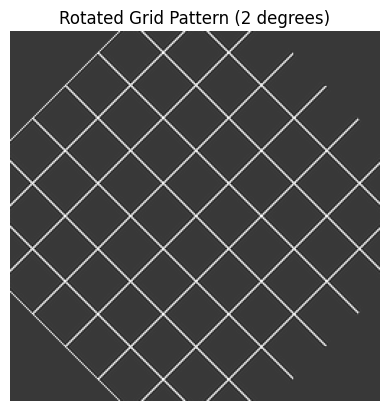

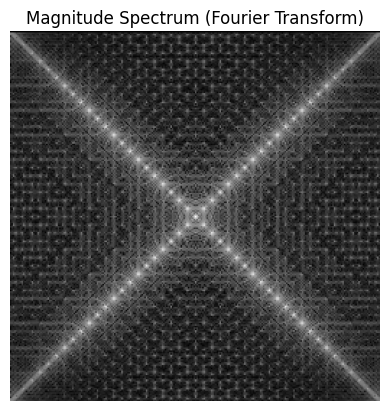

In [134]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import rotate

# Image size
N = 256  # Change the value to adjust the image size

# Create grid pattern
grid_pattern = np.zeros((N, N))
grid_pattern[::32, :] = 1  # Set every 32nd row to 1
grid_pattern[:, ::32] = 1  # Set every 32nd column to 1

# Rotate the grid pattern by 2 degrees
rotated_grid_pattern = rotate(grid_pattern, 45, reshape=False)

# Plot the rotated grid pattern
plt.imshow(rotated_grid_pattern, cmap='gray')
plt.title('Rotated Grid Pattern (2 degrees)')
plt.axis('off')  # Turn off axis
plt.show()

# Compute Fourier transform of the rotated grid pattern
fourier_transform = np.fft.fft2(rotated_grid_pattern)
magnitude_spectrum = np.abs(np.fft.fftshift(fourier_transform))

# Plot the magnitude spectrum
plt.imshow(np.log(1 + magnitude_spectrum), cmap='gray')
plt.title('Magnitude Spectrum (Fourier Transform)')
plt.axis('off')  # Turn off axis
plt.show()



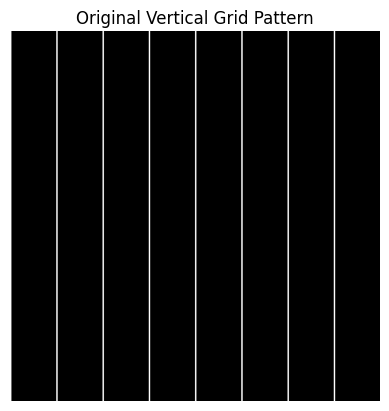

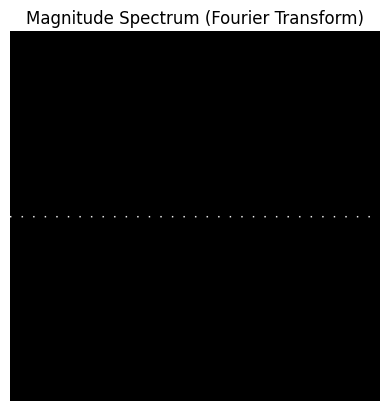

In [111]:
import numpy as np
import matplotlib.pyplot as plt

# Image size
N = 256  # Change the value to adjust the image size

# Create grid pattern with only vertical lines
grid_pattern = np.zeros((N, N))
grid_pattern[:, ::32] = 1  # Set every 16th column to 1 for vertical lines

# Plot the grid pattern
plt.imshow(grid_pattern, cmap='gray')
plt.title('Original Vertical Grid Pattern')
plt.axis('off')  # Turn off axis
plt.show()

# Compute Fourier transform
fourier_transform = np.fft.fft2(grid_pattern)
magnitude_spectrum = np.abs(np.fft.fftshift(fourier_transform))


# Plot the magnitude spectrum
plt.imshow(np.log(1 + magnitude_spectrum), cmap='gray')
plt.title('Magnitude Spectrum (Fourier Transform)')
plt.axis('off')  # Turn off axis
plt.show()


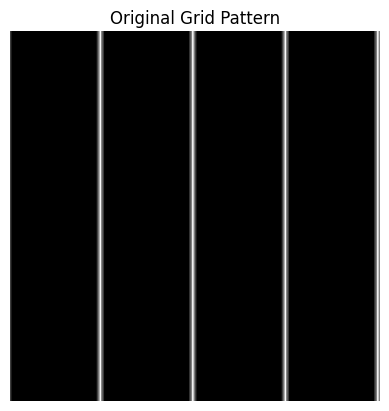

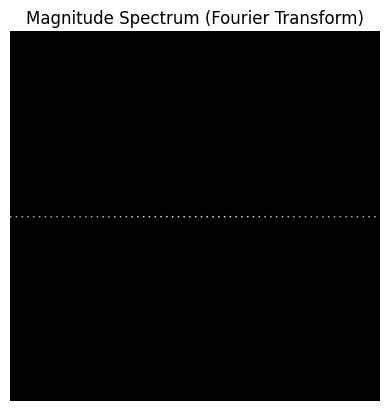

In [125]:
import numpy as np
import matplotlib.pyplot as plt

# Image size
N = 256  # Change the value to adjust the image size

# Create grid pattern with alternating gray-white-gray lines
grid_pattern = np.zeros((N, N))

# Set every 16th column to gray (0.5) for the first line in each group of three
grid_pattern[:, ::64] = 0.25
grid_pattern[:, 63::64] = 0.5
grid_pattern[:, 62::64] = 1
grid_pattern[:, 61::64] = 0.5
grid_pattern[:, 60::64] = 0.25


# Plot the grid pattern
plt.imshow(grid_pattern, cmap='gray')
plt.title('Original Grid Pattern')
plt.axis('off')  # Turn off axis
plt.show()

# Compute Fourier transform
fourier_transform = np.fft.fft2(grid_pattern)
magnitude_spectrum = np.abs(np.fft.fftshift(fourier_transform))

# Plot the magnitude spectrum
plt.imshow(np.log(1 + magnitude_spectrum), cmap='gray')
plt.title('Magnitude Spectrum (Fourier Transform)')
plt.axis('off')  # Turn off axis
plt.show()



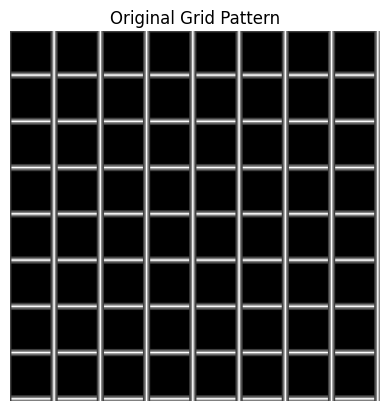

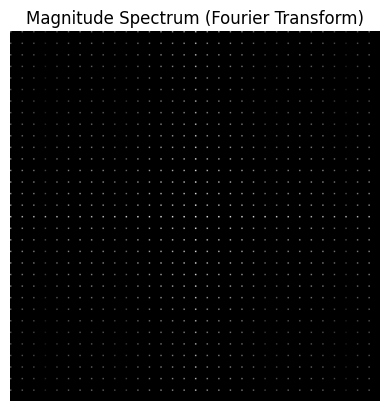

In [127]:
import numpy as np
import matplotlib.pyplot as plt

# Image size
N = 256  # Change the value to adjust the image size

# Create grid pattern with alternating gray-white-gray lines both horizontally and vertically
grid_pattern = np.zeros((N, N))

# Set every 16th row to gray (0.5) for the first line in each group of three

grid_pattern[::32, :] = 0.25
grid_pattern[31::32, :] = 0.5
grid_pattern[30::32, :] = 1.0
grid_pattern[29::32, :] = 0.5
grid_pattern[28::32, :] = 0.25


# Set every 16th column to gray (0.5) for the first line in each group of three
grid_pattern[:, ::32] = 0.25
grid_pattern[:, 31::32] = 0.5
grid_pattern[:, 30::32] = 1.0
grid_pattern[:, 29::32] = 0.5
grid_pattern[:, 28::32] = 0.25


# Plot the grid pattern
plt.imshow(grid_pattern, cmap='gray')
plt.title('Original Grid Pattern')
plt.axis('off')  # Turn off axis
plt.show()

# Compute Fourier transform
fourier_transform = np.fft.fft2(grid_pattern)
magnitude_spectrum = np.abs(np.fft.fftshift(fourier_transform))

# Plot the magnitude spectrum
plt.imshow(np.log(1 + magnitude_spectrum), cmap='gray')
plt.title('Magnitude Spectrum (Fourier Transform)')
plt.axis('off')  # Turn off axis
plt.show()


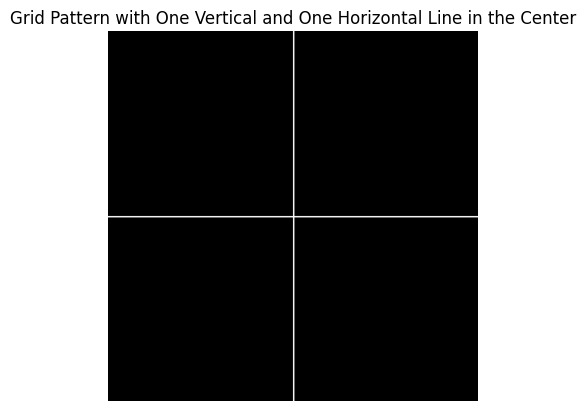

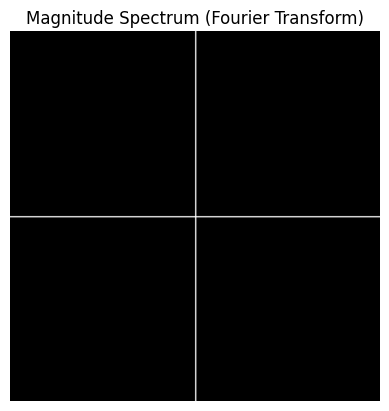

In [137]:
import numpy as np
import matplotlib.pyplot as plt

# Image size
N = 256  # Change the value to adjust the image size

# Create grid pattern with one vertical and one horizontal line in the center
grid_pattern = np.zeros((N, N))

# Set one vertical line in the center
grid_pattern[:, N // 2] = 1.0


# Set one horizontal line in the center
grid_pattern[N // 2, :] = 1.0

# Plot the grid pattern
plt.imshow(grid_pattern, cmap='gray')
plt.title('Grid Pattern with One Vertical and One Horizontal Line in the Center')
plt.axis('off')  # Turn off axis
plt.show()

# Compute Fourier transform
fourier_transform = np.fft.fft2(grid_pattern)
magnitude_spectrum = np.abs(np.fft.fftshift(fourier_transform))

# Plot the magnitude spectrum
plt.imshow(np.log(1 + magnitude_spectrum), cmap='gray')
plt.title('Magnitude Spectrum (Fourier Transform)')
plt.axis('off')  # Turn off axis
plt.show()


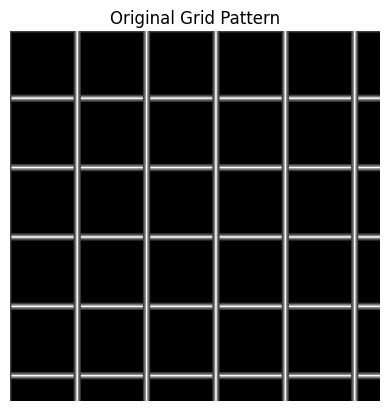

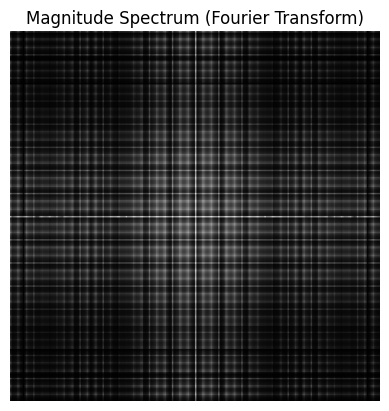

In [128]:
import numpy as np
import matplotlib.pyplot as plt

# Image size
N = 256  # Change the value to adjust the image size

# Create grid pattern with alternating gray-white-gray lines both horizontally and vertically
grid_pattern = np.zeros((N, N))

# Set every 16th row to gray (0.5) for the first line in each group of three

grid_pattern[::48, :] = 0.25
grid_pattern[47::48, :] = 0.5
grid_pattern[46::48, :] = 1.0
grid_pattern[45::48, :] = 0.5
grid_pattern[44::48, :] = 0.25


# Set every 16th column to gray (0.5) for the first line in each group of three
grid_pattern[:, ::48] = 0.25
grid_pattern[:, 47::48] = 0.5
grid_pattern[:, 46::48] = 1.0
grid_pattern[:, 45::48] = 0.5
grid_pattern[:, 44::48] = 0.25


# Plot the grid pattern
plt.imshow(grid_pattern, cmap='gray')
plt.title('Original Grid Pattern')
plt.axis('off')  # Turn off axis
plt.show()

# Compute Fourier transform
fourier_transform = np.fft.fft2(grid_pattern)
magnitude_spectrum = np.abs(np.fft.fftshift(fourier_transform))

# Plot the magnitude spectrum
plt.imshow(np.log(1 + magnitude_spectrum), cmap='gray')
plt.title('Magnitude Spectrum (Fourier Transform)')
plt.axis('off')  # Turn off axis
plt.show()


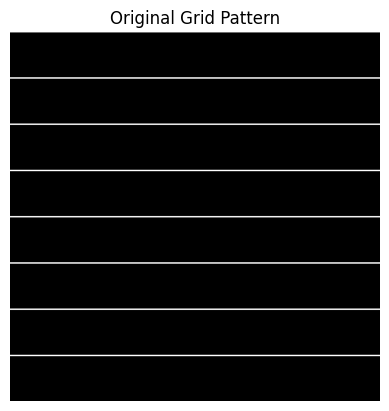

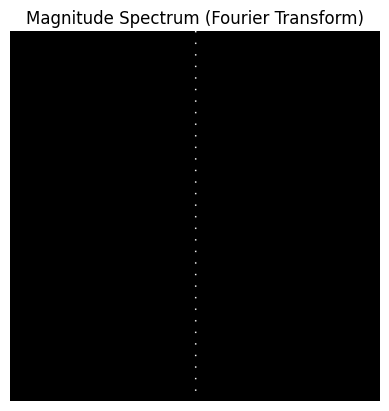

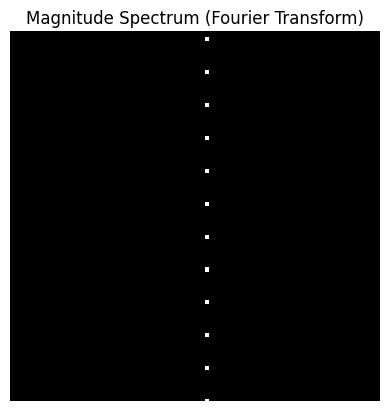

In [96]:
import numpy as np
import matplotlib.pyplot as plt

# Image size
N = 256  # Change the value to adjust the image size

# Create grid pattern with alternating gray-white-gray lines both horizontally and vertically
grid_pattern = np.zeros((N, N))

# Set every 16th row to gray (0.5) for the first line in each group of three
grid_pattern[::32, :] = 1
#grid_pattern[1::48, :] = 1.0
#grid_pattern[2::48, :] = 0.5



# Set every 16th column to gray (0.5) for the first line in each group of three
#grid_pattern[:, ::48] = 1
#grid_pattern[:, 1::48] = 1.0
#grid_pattern[:, 2::48] = 0.5

# Plot the grid pattern
plt.imshow(grid_pattern, cmap='gray')
plt.title('Original Grid Pattern')
plt.axis('off')  # Turn off axis
plt.show()

# Compute Fourier transform
fourier_transform = np.fft.fft2(grid_pattern)
magnitude_spectrum = np.abs(np.fft.fftshift(fourier_transform))

# Plot the magnitude spectrum
plt.imshow(np.log(1 + magnitude_spectrum), cmap='gray')
plt.title('Magnitude Spectrum (Fourier Transform)')
plt.axis('off')  # Turn off axis
plt.show()

# Plot the magnitude spectrum
plt.imshow(np.log(1 + magnitude_spectrum), cmap='gray')
plt.title('Magnitude Spectrum (Fourier Transform)')
plt.axis('off')  # Turn off axis
plt.xlim([80, 170])
plt.ylim([80, 170])  # Note, order is reversed for y
plt.show()


(-0.5, 255.5, 255.5, -0.5)

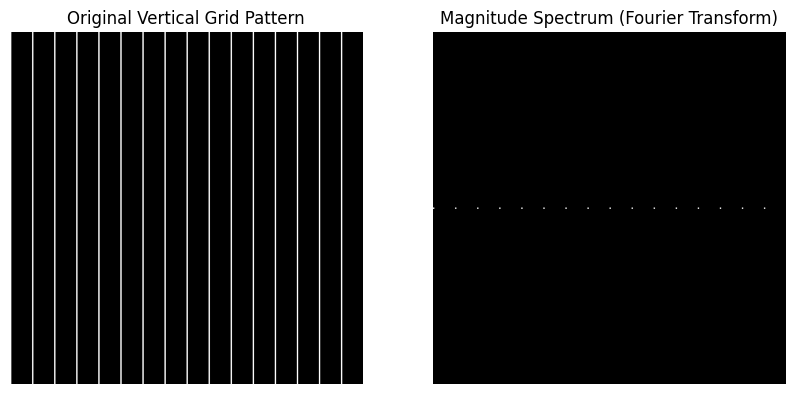

In [59]:
import numpy as np
import matplotlib.pyplot as plt

# Image size
N = 256  # Change the value to adjust the image size

# Create grid pattern with only vertical lines
grid_pattern = np.zeros((N, N))
grid_pattern[:, ::16] = 1  # Set every 16th column to 1 for vertical lines

# Plot the grid pattern
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(grid_pattern, cmap='gray')
plt.title('Original Vertical Grid Pattern')
plt.axis('off')  # Turn off axis

# Compute Fourier transform
fourier_transform = np.fft.fft2(grid_pattern)
magnitude_spectrum = np.abs(np.fft.fftshift(fourier_transform))

# Plot the magnitude spectrum
plt.subplot(1, 2, 2)
plt.imshow(np.log(1 + magnitude_spectrum), cmap='gray')
plt.title('Magnitude Spectrum (Fourier Transform)')
plt.axis('off')  # Turn off axis


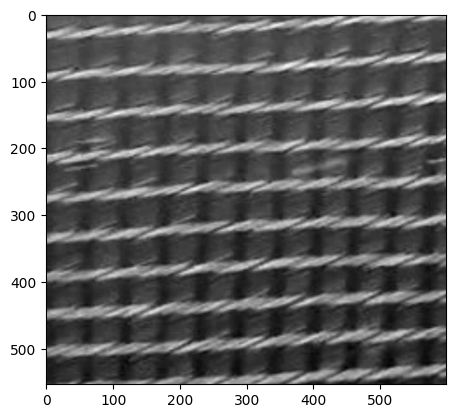

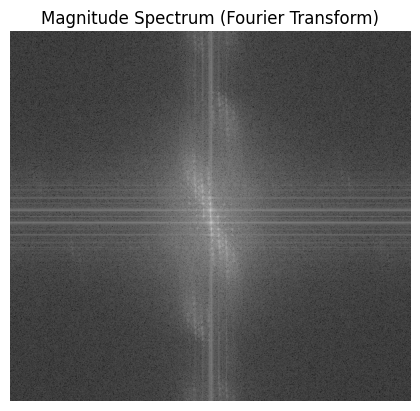

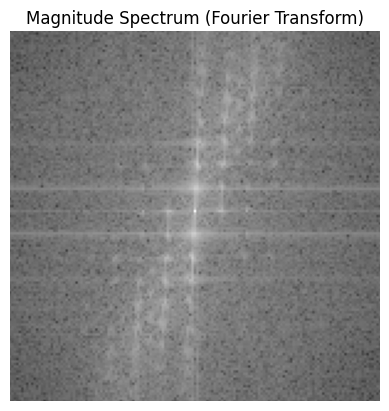

In [129]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Load the image
image = Image.open('net.png').convert('L')  # Convert to grayscale
grid_pattern = np.array(image)

# Compute Fourier transform
fourier_transform = np.fft.fft2(grid_pattern)
magnitude_spectrum = np.abs(np.fft.fftshift(fourier_transform))

plt.imshow(grid_pattern)
plt.show()

# Plot the magnitude spectrum
plt.imshow(np.log(1 + magnitude_spectrum), cmap='gray')
plt.title('Magnitude Spectrum (Fourier Transform)')
plt.axis('off')  # Turn off axis
plt.show()

# Plot the magnitude spectrum
plt.imshow(np.log(1 + magnitude_spectrum), cmap='gray')
plt.title('Magnitude Spectrum (Fourier Transform)')
plt.axis('off')  # Turn off axis
plt.xlim([225, 375])
plt.ylim([200, 350])  # Note, order is reversed for y
plt.show()
